<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Practice Project: Insurance Cost Analysis**

Estimated time needed: **75** minutes

In this project, you have to perform analytics operations on an insurance database that uses the below mentioned parameters.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

## Objectives 
In this project, you will:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 
 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Download the dataset to this lab environment

Run the cell below to load the dataset to this lab environment.


In [3]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

# Task 1 : Import the dataset

Import the dataset into a `pandas` dataframe. Note that there are currently no headers in the CSV file. 

Print the first 10 rows of the dataframe to confirm successful loading.


In [ ]:
df=pd.read_csv(path,headers=None)
df.head()

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


Add the following headers to the dataframe, as mentioned in the project scenario. 


In [ ]:
headers=["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]

df.columns=headers
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


Now, replace the '?' entries with 'NaN' values.


In [24]:
df.replace('?',np.nan,inplace=True)

# Task 2 : Data Wrangling


Identify the columns that have some 'Null' (or NaN) information.


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


Handle missing data:

- For continuous attributes (e.g., age), replace missing values with the mean.
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
- Update the data types of the respective columns.
- Verify the update using `df.info()`.


In [41]:
df["age"].replace(np.nan,df["age"].astype(float).mean(),inplace=True)
Fr=df["smoker"].value_counts().idxmax()
df["smoker"].replace(np.nan,Fr,inplace=True)

df[["age","smoker"]]=df[["age","smoker"]].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int64  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   int64  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


Also note, that the `charges` column has values which are more than 2 decimal places long. Update the `charges` column such that all values are rounded to nearest 2 decimal places. Verify conversion by printing the first 5 values of the updated dataframe.


In [42]:
df["charges"]=df["charges"].round(2)
df["charges"].head(5)

0     1725.55
1     4449.46
2    21984.47
3     3866.86
4     3756.62
Name: charges, dtype: float64

# Task 3 : Exploratory Data Analysis (EDA)

Implement the regression plot for `charges` with respect to `bmi`. 


(0.0, 66902.85800000001)

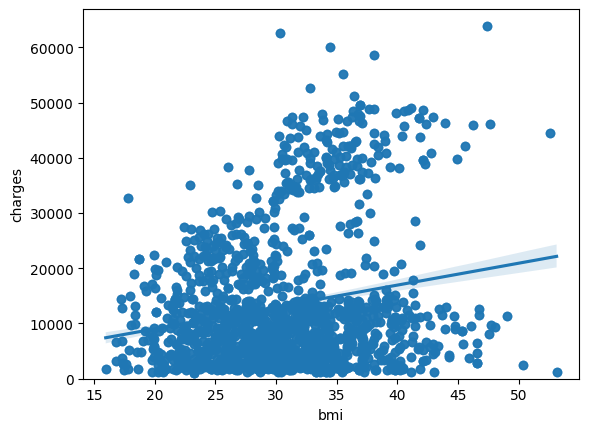

In [53]:
sns.regplot(x='bmi',y='charges',data=df)
plt.ylim(0,)

Implement the box plot for `charges` with respect to `smoker`.


<Axes: xlabel='smoker', ylabel='charges'>

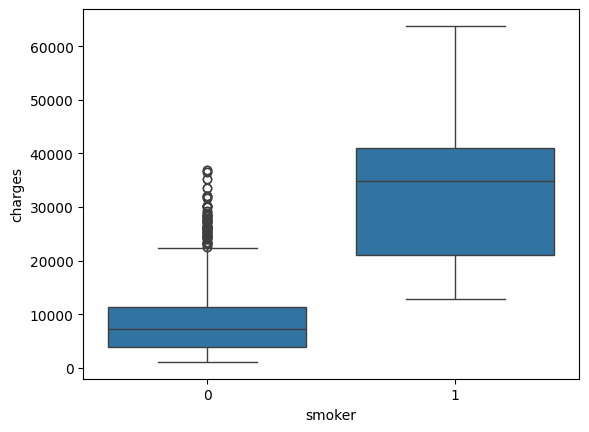

In [45]:
sns.boxplot(x='smoker',y='charges',data=df)

Print the correlation matrix for the dataset.


In [54]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026584,0.112859,0.037126,-0.022290,-0.006969,0.298892
gender,-0.026584,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
bmi,0.112859,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
no_of_children,0.037126,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
smoker,-0.022290,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
region,-0.006969,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
charges,0.298892,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


# Task 4 : Model Development

Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset. Print the $ R^2 $ score of this model.


In [66]:
from sklearn.linear_model import LinearRegression

X=df[["smoker"]]
lm=LinearRegression()
lm.fit(X,df[["charges"]])

Rsqr=lm.score(X,df[["charges"]])
print(f"The smoker/charges relationship explains {Rsqr*100:.2f}% of the variation in insurance charges")

The smoker/charges relationship explains 62.27% of the variation in insurance charges


Fit a linear regression model that may be used to predict the `charges` value, just by using all other attributes of the dataset. Print the $ R^2 $ score of this model. You should see an improvement in the performance.


In [73]:
Z=df.drop(df[["charges"]],axis=1)

lm2=LinearRegression()
lm2.fit(Z,df[["charges"]])

Rsqr2=lm2.score(Z,df[["charges"]])
print(Rsqr2)

0.7505888664568174


In [ ]:
#the combined feature in our data explain 75% of the variation in charges using the linear regression model

Create a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset. There should be even further improvement in the performance.


In [91]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline

Pipe=Pipeline([('scale',StandardScaler()),('polynomial',PolynomialFeatures()),('model',LinearRegression())])
Pipe.fit(Z,df[["charges"]])

Rpoly=Pipe.score(Z,df[["charges"]])
Rpoly

0.8453719105568606

In [ ]:
#remember to set bias to false on Polynomial transformation object (Why?) and using the predictor variables as float data types when implementing standard scaling

# Task 5 : Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.


In [86]:
from sklearn.model_selection import train_test_split

z_train,z_test,y_train,y_test=train_test_split(Z,df[["charges"]],test_size=0.2,random_state=0)

Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.


In [87]:
from sklearn.linear_model import Ridge

rm=Ridge(alpha=0.1)
rm.fit(z_train,y_train)

Rrm=rm.score(z_test,y_test)
Rrm

0.7564820031628499

In [88]:
#alternative approach
from sklearn.metrics import r2_score

Ypred=rm.predict(z_test)
RrmV2=r2_score(y_test,Ypred)
RrmV2

0.7564820031628499

Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.


In [ ]:
Pr=PolynomialFeatures(degree=2)
z_train_pr=Pr.fit_transform(z_train)

z_train_pr.shape[1]

28

In [94]:
rm.fit(z_train_pr,y_train)

z_test_pr=Pr.fit_transform(z_test)
rm.score(z_test_pr,y_test)

0.8536751831575968

In [95]:
#alternatively
Yhat_test=rm.predict(z_test_pr)
r2_score(y_test,Yhat_test)

0.8536751831575968

# Congratulations! You have completed this project


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|


<h3> Copyright © 2023 IBM Corporation. All rights reserved. </h3>
